In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
#read csv and decompress bzip file
df = pd.read_csv('2008.csv.bz2', compression='bz2', header=0, sep=',', quotechar='"')

In [3]:
df.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
#identify percent of columns that are null
print(100 * df.isnull().sum()/len(df))

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.943670
CRSDepTime            0.000000
ArrTime               2.163408
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               1.189276
ActualElapsedTime     2.206919
CRSElapsedTime        0.012040
AirTime               2.206919
ArrDelay              2.206919
DepDelay              1.943670
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                2.163408
TaxiOut               1.955254
Cancelled             0.000000
CancellationCode     98.039382
Diverted              0.000000
CarrierDelay         78.248300
WeatherDelay         78.248300
NASDelay             78.248300
SecurityDelay        78.248300
LateAircraftDelay    78.248300
dtype: float64


In [5]:
#remove columns with a >50 percent null and unnecessary columns
df2 = df.drop(['LateAircraftDelay', 'SecurityDelay', 'NASDelay','WeatherDelay', 'CarrierDelay', 'CancellationCode', 'FlightNum', 'TailNum'], 1)


In [6]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,...,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,...,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,0
2,2008,1,3,4,628.0,620,804.0,750,WN,96.0,...,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,88.0,...,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,0


In [7]:
print(100 * df2.isnull().sum()/len(df2))

Year                 0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              1.943670
CRSDepTime           0.000000
ArrTime              2.163408
CRSArrTime           0.000000
UniqueCarrier        0.000000
ActualElapsedTime    2.206919
CRSElapsedTime       0.012040
AirTime              2.206919
ArrDelay             2.206919
DepDelay             1.943670
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               2.163408
TaxiOut              1.955254
Cancelled            0.000000
Diverted             0.000000
dtype: float64


In [8]:
df2.DepTime.mean()

1333.8300461105448

In [9]:
#fill na's for other columns
df2.DepTime = df2.DepTime.fillna((df2.DepTime.mean()))

In [10]:
#check that it worked
df2.DepTime.mean()

1333.8300461105441

In [11]:
#do it for the other columns with missing values
df2.ArrTime = df2.ArrTime.fillna((df2.ArrTime.mean()))
df2.ActualElapsedTime = df2.ActualElapsedTime.fillna((df2.ActualElapsedTime.mean()))
df2.CRSElapsedTime = df2.CRSElapsedTime.fillna((df2.CRSElapsedTime.mean()))
df2.AirTime = df2.AirTime.fillna((df2.AirTime.mean()))
df2.ArrDelay = df2.ArrDelay.fillna((df2.ArrDelay.mean()))
df2.DepDelay = df2.DepDelay.fillna((df2.DepDelay.mean()))
df2.TaxiIn = df2.TaxiIn.fillna((df2.TaxiIn.mean()))
df2.TaxiOut = df2.TaxiOut.fillna((df2.TaxiOut.mean()))

In [12]:
#check that it worked
print(100 * df2.isnull().sum()/len(df2))

Year                 0.0
Month                0.0
DayofMonth           0.0
DayOfWeek            0.0
DepTime              0.0
CRSDepTime           0.0
ArrTime              0.0
CRSArrTime           0.0
UniqueCarrier        0.0
ActualElapsedTime    0.0
CRSElapsedTime       0.0
AirTime              0.0
ArrDelay             0.0
DepDelay             0.0
Origin               0.0
Dest                 0.0
Distance             0.0
TaxiIn               0.0
TaxiOut              0.0
Cancelled            0.0
Diverted             0.0
dtype: float64


In [13]:
#create a new column to denote late planes
df2['Late'] = np.where(df2['ArrDelay']>=30, 1, 0)
print(df2.Late)

0          0
1          0
2          0
3          0
4          1
5          0
6          1
7          0
8          0
9          0
10         0
11         1
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         1
20         0
21         0
22         0
23         0
24         0
25         0
26         1
27         0
28         0
29         0
          ..
7009698    0
7009699    0
7009700    0
7009701    1
7009702    0
7009703    0
7009704    0
7009705    1
7009706    0
7009707    0
7009708    0
7009709    0
7009710    0
7009711    0
7009712    0
7009713    0
7009714    0
7009715    0
7009716    0
7009717    1
7009718    1
7009719    0
7009720    0
7009721    0
7009722    0
7009723    0
7009724    0
7009725    0
7009726    0
7009727    0
Name: Late, Length: 7009728, dtype: int32


In [15]:
#check out features
df2.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
Late                   int32
dtype: object

In [16]:
#remove object
df2 = df2.drop(['UniqueCarrier'],1)

In [24]:
df2 = df2.drop(['Origin', 'Dest'],1)

In [32]:
#create X and y variables
y = df2['Late'].values.reshape(-1, 1)
X = df2.loc[:, ~(df2.columns).isin(['Late'])]
print(X.head())

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4    926.0         930   1054.0   
4  2008      1           3          4   1829.0        1755   1959.0   

   CRSArrTime  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  \
0        2225              128.0           150.0    116.0     -14.0       8.0   
1        1000              128.0           145.0    113.0       2.0      19.0   
2         750               96.0            90.0     76.0      14.0       8.0   
3        1100               88.0            90.0     78.0      -6.0      -4.0   
4        1925               90.0            90.0     77.0      34.0      34.0   

   Distance  TaxiIn  TaxiOut  Cancelled  Diverted  
0       810     4.0      8.0      

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

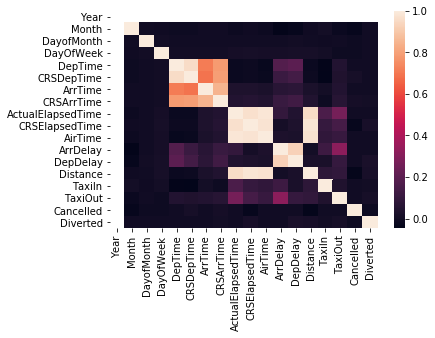

In [46]:
#check for collinearity
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = X.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [47]:
X = X.drop(['CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime'], 1)

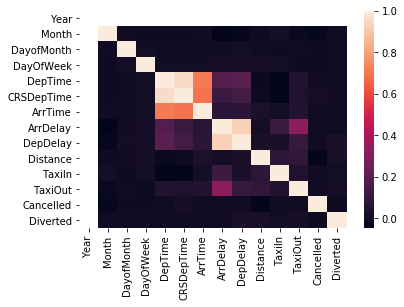

In [48]:
corr = X.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [53]:
df.Late.value_counts()

0    6082313
1     927415
Name: Late, dtype: int64

In [49]:
X = X.drop(['CRSDepTime'], 1)

In [50]:
#create training and testing variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [54]:
X_train.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
5947563,2008,11,5,3,1321.0,1632.0,-18.0,-4.0,883,6.0,9.0,0,0
440950,2008,1,29,2,1516.0,1836.0,7.0,-4.0,872,5.0,12.0,0,0
4909729,2008,9,22,1,1119.0,1155.0,-15.0,-6.0,612,5.0,9.0,0,0
2481418,2008,5,31,6,1017.0,1248.0,-7.0,-3.0,562,5.0,9.0,0,0
1007634,2008,2,9,6,1454.0,1753.0,-19.0,-2.0,1127,12.0,20.0,0,0


In [55]:
X_test.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
1767993,2008,3,28,5,920.0,1159.0,-19.0,-5.0,1025,3.0,11.0,0,0
3073423,2008,6,26,4,1005.0,1142.0,-13.0,0.0,1013,7.0,13.0,0,0
922712,2008,2,15,5,2034.0,2133.0,30.0,35.0,238,4.0,19.0,0,0
1517855,2008,3,10,1,1003.0,1307.0,-19.0,-7.0,774,6.0,9.0,0,0
6480817,2008,12,8,1,1131.0,1321.0,-9.0,6.0,663,5.0,8.0,0,0


In [57]:
print(y_train[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [51]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

#check train data
rfc = ensemble.RandomForestClassifier()
model = rfc.fit(X_train, y_train.ravel())
score = cross_val_score(model, X_train, y_train.ravel(), cv=5)
print(score)
print ('Mean cross validation score for train is: ' + str(np.mean(score)))

c:\users\kgrosse\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1. 1. 1. 1. 1.]
Mean cross validation score for train is: 1.0


In [61]:
predict = model.predict(X_test)

In [63]:
#convert array to list
df2 = pd.DataFrame(predict, y_test)
df2.head()
##create a new column with a lambda function to compare if the values in the columns are equal or not.

TypeError: unsupported format string passed to numpy.ndarray.__format__

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.ravel()) 
score = cross_val_score(model, X_train, y_train.ravel(), cv=5)
print(score)
print ('Mean cross validation score for train is: ' + str(np.mean(score)))

[1. 1. 1. 1. 1.]
Mean cross validation score for train is: 1.0


In [37]:
print(y_train.ravel())

[1 1 0 ... 0 0 0]


In [33]:
X_train.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

In [ ]:
#X = df.loc[:, df.columns != 'Late']
#y = df2['Late']